In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.metrics import mean_squared_error
from pmdarima  import auto_arima
from datetime import datetime
import plotly.express as px
import plotly.offline as py
from scipy.stats import norm
from evds import evdsAPI
import ssl
from datetime import datetime
from scipy.stats import norm
from pandas.io import gbq
ssl._create_default_https_context = ssl._create_unverified_context
evds = evdsAPI('########')

In [2]:
#getting an dollar-turkish lira dataset for last 3 years
df=evds.get_data(['TP.DK.USD.A.YTL'], startdate="01-01-2017", enddate='1-07-2020').fillna(method='ffill')
df['Tarih']=pd.to_datetime(df['Tarih'], format="%d-%m-%Y")
df=df.set_index(df['Tarih'])
df=df.dropna()
df.tail()

,Tarih,TP_DK_USD_A_YTL
Tarih,,
2020-06-27,2020-06-27,6.8434
2020-06-28,2020-06-28,6.8434
2020-06-29,2020-06-29,6.8417
2020-06-30,2020-06-30,6.8422
2020-07-01,2020-07-01,6.8432


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1277 entries, 2017-01-02 to 2020-07-01
Data columns (total 2 columns):
Tarih              1277 non-null datetime64[ns]
TP_DK_USD_A_YTL    1277 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.9 KB


In [4]:
#df['TP_DK_USD_A_YTL'].plot()
#fig = px.line(df, x=df.index, y='TP_DK_USD_A_YTL', title='usd-tl')
#fig.show()

In [5]:
f_sarima_model = auto_arima(df['TP_DK_USD_A_YTL'], trace = True, start_p = 0, d =0, start_q = 0,
                  max_p = 10, max_q = 10, m = 7, seasonal = True,
                  stepwise = True)
f_sarima_model.fit(df['TP_DK_USD_A_YTL'])
f_sarima_forecast = f_sarima_model.predict(n_periods= 30)
n_steps=30
idx = pd.date_range(df['TP_DK_USD_A_YTL'].index[-1], periods=n_steps,  freq='B')

forecast = f_sarima_model.predict(n_periods= 30) 
fc_all = pd.DataFrame(forecast,                     
                 index=idx, columns=['predicted'])

Performing stepwise search to minimize aic
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

Fit ARIMA(0,0,0)x(1,0,1,7) [intercept=True]; AIC=-1476.979, BIC=-1456.370, Time=2.154 seconds
Fit ARIMA(0,0,0)x(0,0,0,7) [intercept=True]; AIC=3895.371, BIC=3905.675, Time=0.036 seconds
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

Fit ARIMA(1,0,0)x(1,0,0,7) [intercept=True]; AIC=-3955.888, BIC=-3935.279, Time=1.615 seconds
Near non-invertible roots for order (1, 0, 0)(1, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,0,1)x(0,0,1,7) [intercept=True]; AIC=946.150, BIC=966.759, Time=0.972 seconds
Fit ARIMA(0,0,0)x(0,0,0,7) 

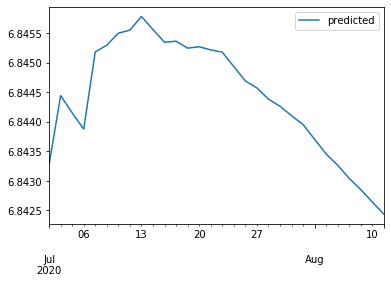

In [6]:
#30 days prediction
fc_all.plot()